# Assignment 2
> FAN Shun **57445835**


## Classify $reptile$ and $not-a-reptile$
### Read Data and Pre-processing

In [1]:
import pandas as pd

data = pd.read_csv('vertebrate.csv',header='infer')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


Adjust the data to replace Class in the table with a binary classification of `reptile` and `not-a-reptile`

In [2]:
data['Class'] = data['Class'].replace(['fishes','birds','amphibians','mammals'],'non-reptiles')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,non-reptiles
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,non-reptiles
3,whale,1,1,1,0,0,0,non-reptiles
4,frog,0,0,1,0,1,1,non-reptiles
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,non-reptiles
7,pigeon,1,0,0,1,1,0,non-reptiles
8,cat,1,1,0,0,1,0,non-reptiles
9,leopard shark,0,1,1,0,0,0,non-reptiles


In [3]:
pd.crosstab([data['Aquatic Creature'],data['Gives Birth']],data['Class'])

Class                         non-reptiles  reptiles
Aquatic Creature Gives Birth                        
0                0                       1         2
                 1                       4         0
1                0                       5         1
                 1                       2         0

It can be seen that it is difficult to fully classify the two in purely two categories

### Designing a decision tree model with a maximum depth of $2$

In [4]:
from sklearn import tree

Y = data['Class']
X = data.drop(['Name','Class'],axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=2)
clf = clf.fit(X, Y)

### Decision tree visualisation

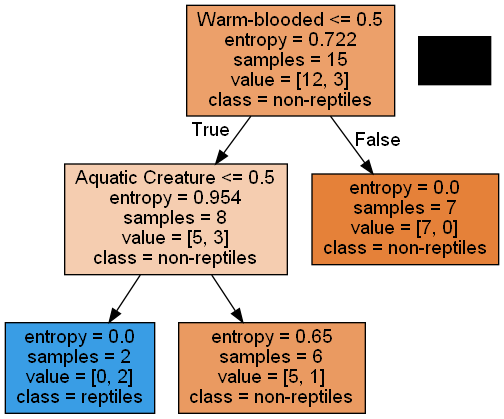

In [5]:
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['non-reptiles','reptiles'], filled=True,
                                out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Designing test data sets

In [6]:
testData = [['gila monster',0,0,0,0,1,1,'reptiles'],
            ['platypus',1,0,0,0,1,1,'non-reptiles'],
            ['owl',1,0,0,1,1,0,'non-reptiles'],
            ['dolphin',1,1,1,0,0,0,'non-reptiles']]
testData = pd.DataFrame(testData, columns=data.columns)
testData

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,gila monster,0,0,0,0,1,1,reptiles
1,platypus,1,0,0,0,1,1,non-reptiles
2,owl,1,0,0,1,1,0,non-reptiles
3,dolphin,1,1,1,0,0,0,non-reptiles


### Get the testing results and calculate the testing accuracy

In [7]:
testY = testData['Class']
testX = testData.drop(['Name','Class'],axis=1)

predY = clf.predict(testX)
predictions = pd.concat([testData['Name'],pd.Series(predY,name='Predicted Class')], axis=1)
predictions

,Name,Predicted Class
0,gila monster,reptiles
1,platypus,non-reptiles
2,owl,non-reptiles
3,dolphin,non-reptiles


In [8]:
from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

Accuracy on test data is 1.00


## Classification of $reptiles$ and $non-reptiles$ (the maximum depth of the decision tree is **not restricted**).
### Design the classifier

In [9]:
Y = data['Class']
X = data.drop(['Name','Class'],axis=1)

clf_noLimit = tree.DecisionTreeClassifier(criterion='entropy')
clf_noLimit = clf_noLimit.fit(X, Y)

### Decision tree visualisation

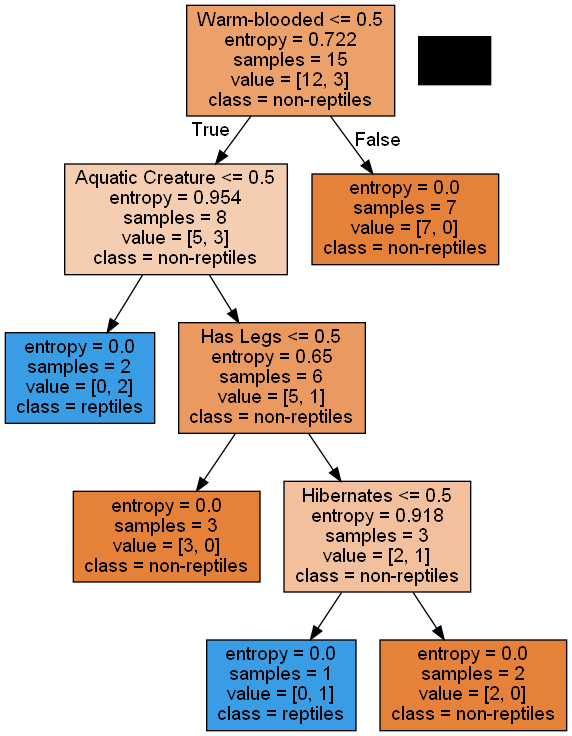

In [10]:
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(clf_noLimit, feature_names=X.columns, class_names=['non-reptiles','reptiles'], filled=True,
                                out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Get the testing results and calculate the testing accuracy

In [11]:
testY = testData['Class']
testX = testData.drop(['Name','Class'],axis=1)

predY = clf.predict(testX)
predictions = pd.concat([testData['Name'],pd.Series(predY,name='Predicted Class')], axis=1)
predictions

,Name,Predicted Class
0,gila monster,reptiles
1,platypus,non-reptiles
2,owl,non-reptiles
3,dolphin,non-reptiles


In [12]:
print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

Accuracy on test data is 1.00


### Comparing two decision trees
  For the unrestricted depth decision tree, a complete classification of the training set was achieved, and 100% accuracy was obtained in the test set.

  However, compared to the restricted depth, the accuracy is the same, but the decision tree's depth is deeper, meaning more computation is required.

  There is a reason why the restricted depth can give the same accuracy as the unrestricted depth in the test set because the test set has a smaller amount of data.


## Test For Model Overfitting

To illustrate the problem of model overfitting, the sample considers a two-dimensional dataset containing 1500 labelled instances, each of which is assigned to one of two classes, i.e. 0 or 1. The instances of each class are generated in the following manner.

1. Instances of class 1 are generated from a mixture of 3 Gaussian distributions with centres [6,14], [10,6] and [14 14] respectively.
2. Instances of class 0 are generated from a uniform distribution of a square region with side lengths equal to 20.

For simplicity, both classes have the same number of tagged instances. The code for generating and plotting the data is shown below. All instances from class 1 are shown in red, while instances from class 0 are shown in black.

### Generate Data

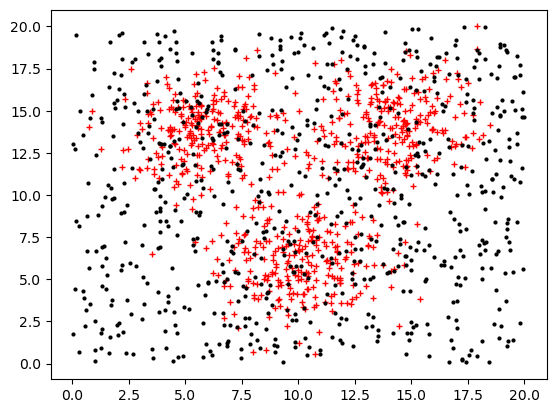

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random

%matplotlib inline

N = 1500

mean1 = [6, 14]
mean2 = [10, 6]
mean3 = [14, 14]
cov = [[3.5, 0], [0, 3.5]]  # diagonal covariance

np.random.seed(50)
X = np.random.multivariate_normal(mean1, cov, int(N/6))
X = np.concatenate((X, np.random.multivariate_normal(mean2, cov, int(N/6))))
X = np.concatenate((X, np.random.multivariate_normal(mean3, cov, int(N/6))))
X = np.concatenate((X, 20*np.random.rand(int(N/2),2)))
Y = np.concatenate((np.ones(int(N/2)),np.zeros(int(N/2))))

plt.plot(X[:int(N/2),0],X[:int(N/2),1],'r+',X[int(N/2):,0],X[int(N/2):,1],'k.',ms=4)

In this example, we keep **50%** of the labelled data for training, the remaining **25%** for validation and **25%** for testing. We then fit decision trees of different maximum depths (from 2 to 50) to the training set and plot their respective accuracies on the training and test sets.

Text(0, 0.5, 'Accuracy')

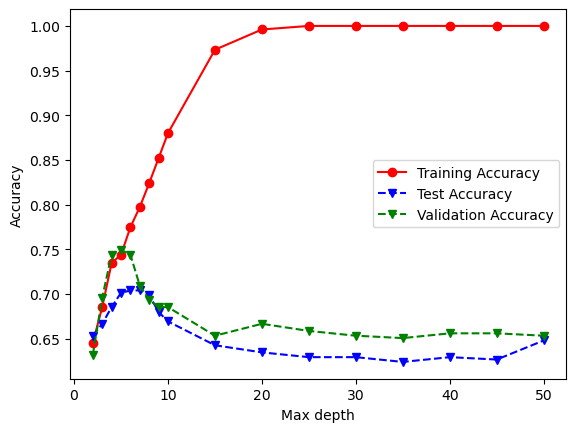

In [14]:
#########################################
# Training, Test and Validation set creation
#########################################

from sklearn.model_selection import train_test_split
X_train, X_, Y_train, Y_ = train_test_split(X, Y, test_size=0.5, random_state=1)
X_test, X_validation, Y_test, Y_validation = train_test_split(X_, Y_, test_size=0.5, random_state=1)

from sklearn import tree
from sklearn.metrics import accuracy_score

#########################################
# Model fitting and evaluation
#########################################

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))
validAcc = np.zeros(len(maxdepths))
index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    Y_predValid = clf.predict(X_validation)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    validAcc[index] = accuracy_score(Y_validation, Y_predValid)
    index += 1

#########################################
# Plot of training, test and validation accuracies
#########################################

plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--',maxdepths,validAcc,'gv--')
plt.legend(['Training Accuracy','Test Accuracy','Validation Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

### Get the best depth of the tree

I think the optimal depth is: $max\_depth = 5$, for the following reasons.
- The test set is still in an upward trend when the $depth = 5$,

- However, the validation set reaches the maximum value when the $depth = 5$, and then it is in a downward trend, that is, there is a possibility of **overfitting**.

Therefore, I believe that the best depth is $depth = 5 $.

### Accuracy of decision tree when $depth = 5 $

In [15]:
print('Accuracy on test data when depth = 5 is %.2f' % (testAcc[maxdepths.index(5)]))

Accuracy on test data when depth = 5 is 0.70
